<a href="https://colab.research.google.com/github/enesergen/Fashion_Models/blob/main/fashion_model_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!ls drive/MyDrive/output/
import os 
for dirpath,dirnames,filenames in os.walk("drive/MyDrive/output"):
  print(f"There are {len(dirnames)} directiories and {len(filenames)} images in '{dirpath}'.")
     

test  train  val
There are 3 directiories and 0 images in 'drive/MyDrive/output'.
There are 49 directiories and 0 images in 'drive/MyDrive/output/train'.
There are 0 directiories and 4 images in 'drive/MyDrive/output/train/Umbrellas'.
There are 0 directiories and 243 images in 'drive/MyDrive/output/train/Track Pants'.
There are 0 directiories and 2033 images in 'drive/MyDrive/output/train/Watches'.
There are 0 directiories and 12 images in 'drive/MyDrive/output/train/Waistcoat'.
There are 0 directiories and 424 images in 'drive/MyDrive/output/train/Trousers'.
There are 0 directiories and 5655 images in 'drive/MyDrive/output/train/Tshirts'.
There are 0 directiories and 13 images in 'drive/MyDrive/output/train/Waist Pouch'.
There are 0 directiories and 23 images in 'drive/MyDrive/output/train/Tracksuits'.
There are 0 directiories and 7 images in 'drive/MyDrive/output/train/Tights'.
There are 0 directiories and 1628 images in 'drive/MyDrive/output/train/Sports Shoes'.
There are 0 directio

In [2]:
train_dir="/content/drive/MyDrive/output/train/"
test_dir="/content/drive/MyDrive/output/test/"
val_dir="/content/drive/MyDrive/output/val/"

In [3]:
import pathlib 
import numpy as np
data_dir=pathlib.Path(train_dir)
class_names=np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['Backpacks' 'Belts' 'Blazers' 'Booties' 'Capris' 'Caps' 'Casual Shoes'
 'Dresses' 'Duffel Bag' 'Earrings' 'Flats' 'Formal Shoes' 'Gloves'
 'Handbags' 'Hat' 'Heels' 'Jackets' 'Jeans' 'Jeggings' 'Jumpsuit'
 'Laptop Bag' 'Leggings' 'Lounge Pants' 'Lounge Shorts' 'Lounge Tshirts'
 'Mufflers' 'Rain Jacket' 'Rain Trousers' 'Rompers' 'Scarves' 'Shirts'
 'Shorts' 'Shrug' 'Skirts' 'Sports Shoes' 'Sunglasses' 'Sweaters'
 'Sweatshirts' 'Swimwear' 'Tights' 'Tops' 'Track Pants' 'Tracksuits'
 'Trousers' 'Tshirts' 'Umbrellas' 'Waist Pouch' 'Waistcoat' 'Watches']


In [4]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (1440, 1080, 3)


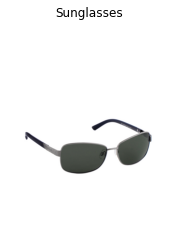

In [5]:
import random
img=view_random_image(target_dir=train_dir,target_class=random.choice(class_names))

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#rescaling
train_datagen_augmented=ImageDataGenerator(rescale=1/255.,
                                           rotation_range=20,
                                           width_shift_range=0.2,
                                           height_shift_range=0.2,
                                           zoom_range=0.2,
                                           horizontal_flip=True)
train_data_augmented=train_datagen_augmented.flow_from_directory(train_dir,
                                                                 target_size=(224,224),
                                                                 batch_size=32,
                                                                 class_mode="categorical")
val_datagen=ImageDataGenerator(rescale=1/255.)
test_datagen=ImageDataGenerator(rescale=1/255.)
val_data=val_datagen.flow_from_directory(val_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode="categorical")
test_data=test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode="categorical")

Found 25101 images belonging to 49 classes.
Found 3122 images belonging to 49 classes.
Found 3185 images belonging to 49 classes.


In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense
from tensorflow.keras.optimizers.legacy import Adam
model_2=Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(49,activation="softmax")

])

model_2.compile(loss="categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

history_2=model_2.fit(train_data_augmented,
                      epochs=5,
                      steps_per_epoch=len(train_data_augmented),
                      validation_data=val_data,
                      validation_steps=len(val_data))


Epoch 1/5
785/785 [==============================] - 10279s 13s/step - loss: 2.2575 - accuracy: 0.3320 - val_loss: 1.5171 - val_accuracy: 0.5471
Epoch 2/5
785/785 [==============================] - 1384s 2s/step - loss: 1.6052 - accuracy: 0.5108 - val_loss: 1.1865 - val_accuracy: 0.6179
Epoch 3/5
785/785 [==============================] - 1381s 2s/step - loss: 1.3914 - accuracy: 0.5693 - val_loss: 1.0150 - val_accuracy: 0.6669
Epoch 4/5
785/785 [==============================] - 1378s 2s/step - loss: 1.2557 - accuracy: 0.6057 - val_loss: 0.9835 - val_accuracy: 0.6928
Epoch 5/5
785/785 [==============================] - 1395s 2s/step - loss: 1.1683 - accuracy: 0.6273 - val_loss: 1.0507 - val_accuracy: 0.6602


In [8]:
model_2.evaluate(test_data)

100/100 [==============================] - 1167s 12s/step - loss: 1.0517 - accuracy: 0.6584


[1.051749587059021, 0.6583987474441528]

In [9]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();
     

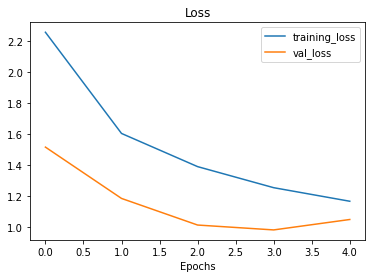

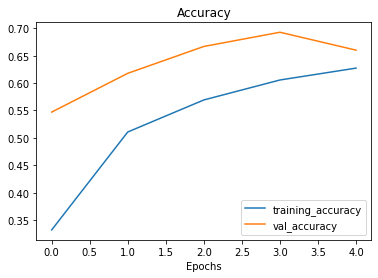

In [10]:
plot_loss_curves(history_2)

In [11]:
model_2.save("Model_2")

In [13]:
model_2.save("Model_1_h5.h5")

In [14]:
!zip -r /content/Model_2 /content/Model_2
from google.colab import files
files.download("/content/Model_2.zip")

  adding: content/Model_2/ (stored 0%)
  adding: content/Model_2/variables/ (stored 0%)
  adding: content/Model_2/variables/variables.index (deflated 73%)
  adding: content/Model_2/variables/variables.data-00000-of-00001 (deflated 11%)
  adding: content/Model_2/saved_model.pb (deflated 90%)
  adding: content/Model_2/assets/ (stored 0%)
  adding: content/Model_2/fingerprint.pb (stored 0%)
  adding: content/Model_2/keras_metadata.pb (deflated 94%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>